In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# plt.rcParams['figure.figsize'] = (16,9) 
plt.rcParams['figure.dpi'] = 600 

In [3]:
os.listdir('../input')

['datasetSentences.txt']

In [4]:
import numpy as np


def softmax(x):
    """Compute the softmax function for each row of the input x.
    It is crucial that this function is optimized for speed because
    it will be used frequently in later code. You might find numpy
    functions np.exp, np.sum, np.reshape, np.max, and numpy
    broadcasting useful for this task.
    Numpy broadcasting documentation:
    http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html
    You should also make sure that your code works for a single
    N-dimensional vector (treat the vector as a single row) and
    for M x N matrices. This may be useful for testing later. Also,
    make sure that the dimensions of the output match the input.
    You must implement the optimization in problem 1(a) of the
    written assignment!
    Arguments:
    x -- A N dimensional vector or M x N dimensional numpy matrix.
    Return:
    x -- You are allowed to modify x in-place
    """
    orig_shape = x.shape

    if len(x.shape) > 1:
        # Matrix
        ### YOUR CODE HERE
        exp_minmax = lambda x: np.exp(x - np.max(x))
        denom = lambda x: 1.0 / np.sum(x)
        x = np.apply_along_axis(exp_minmax, 1, x)
        denominator = np.apply_along_axis(denom, 1, x)

        if len(denominator.shape) == 1:
            denominator = denominator.reshape((denominator.shape[0], 1))

        x = x * denominator
        ### END YOUR CODE
    else:
        # Vector
        ### YOUR CODE HERE
        x_max = np.max(x)
        x = x - x_max
        numerator = np.exp(x)
        denominator = 1.0 / np.sum(numerator)
        x = numerator.dot(denominator)
        ### END YOUR CODE

    assert x.shape == orig_shape
    return x


def test_softmax_basic():
    """
    Some simple tests to get you started.
    Warning: these are not exhaustive.
    """
    print( "Running basic tests...")
    test1 = softmax(np.array([1, 2]))
    print( test1)
    ans1 = np.array([0.26894142, 0.73105858])
    assert np.allclose(test1, ans1, rtol=1e-05, atol=1e-06)

    test2 = softmax(np.array([[1001, 1002], [3, 4]]))
    print( test2)
    ans2 = np.array([
        [0.26894142, 0.73105858],
        [0.26894142, 0.73105858]])
    assert np.allclose(test2, ans2, rtol=1e-05, atol=1e-06)

    test3 = softmax(np.array([[-1001, -1002]]))
    print( test3)
    ans3 = np.array([0.73105858, 0.26894142])
    assert np.allclose(test3, ans3, rtol=1e-05, atol=1e-06)

    print( "You should be able to verify these results by hand!\n")

if __name__ == "__main__":
    test_softmax_basic()


Running basic tests...
[0.26894142 0.73105858]
[[0.26894142 0.73105858]
 [0.26894142 0.73105858]]
[[0.73105858 0.26894142]]
You should be able to verify these results by hand!



In [5]:
import numpy as np
def sigmoid(x):
    """
    Compute the sigmoid function for the input here.
    Arguments:
    x -- A scalar or numpy array.
    Return:
    s -- sigmoid(x)
    """

    ### YOUR CODE HERE
    s = 1.0 / (1 + np.exp(-x))
    ### END YOUR CODE

    return s


def sigmoid_grad(s):
    """
    Compute the gradient for the sigmoid function here. Note that
    for this implementation, the input s should be the sigmoid
    function value of your original input x.
    Arguments:
    s -- A scalar or numpy array.
    Return:
    ds -- Your computed gradient.
    """

    ### YOUR CODE HERE
    ds = s * (1 - s)
    ### END YOUR CODE

    return ds


def test_sigmoid_basic():
    """
    Some simple tests to get you started.
    Warning: these are not exhaustive.
    """
    print( "Running basic tests...")
    x = np.array([[1, 2], [-1, -2]])
    f = sigmoid(x)
    g = sigmoid_grad(f)
    print( f)
    f_ans = np.array([
        [0.73105858, 0.88079708],
        [0.26894142, 0.11920292]])
    assert np.allclose(f, f_ans, rtol=1e-05, atol=1e-06)
    print( g)
    g_ans = np.array([
        [0.19661193, 0.10499359],
        [0.19661193, 0.10499359]])
    assert np.allclose(g, g_ans, rtol=1e-05, atol=1e-06)
    print( "You should verify these results by hand!\n")

if __name__ == "__main__":
    test_sigmoid_basic();


Running basic tests...
[[0.73105858 0.88079708]
 [0.26894142 0.11920292]]
[[0.19661193 0.10499359]
 [0.19661193 0.10499359]]
You should verify these results by hand!



In [6]:
import numpy as np
import random

# First implement a gradient checker by filling in the following functions
def gradcheck_naive(f, x):
    """ Gradient check for a function f.
    Arguments:
    f -- a function that takes a single argument and outputs the
         cost and its gradients
    x -- the point (numpy array) to check the gradient at
    """

    rndstate = random.getstate()
    random.setstate(rndstate)
    fx, grad = f(x) # Evaluate function value at original point
    h = 1e-4        # Do not change this!

    # Iterate over all indexes in x
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        ix = it.multi_index

        # Try modifying x[ix] with h defined above to compute
        # numerical gradients. Make sure you call random.setstate(rndstate)
        # before calling f(x) each time. This will make it possible
        # to test cost functions with built in randomness later.

        ### YOUR CODE HERE:
        x[ix] += h

        random.setstate(rndstate)
        new_f1 = f(x)[0]

        x[ix] -= 2*h

        random.setstate(rndstate)
        new_f2 = f(x)[0]

        x[ix] += h

        numgrad = (new_f1 - new_f2) / (2 * h)
        ### END YOUR CODE

        # Compare gradients
        reldiff = abs(numgrad - grad[ix]) / max(1, abs(numgrad), abs(grad[ix]))
        if reldiff > 1e-5:
            print( "Gradient check failed.")
            print( "First gradient error found at index %s" % str(ix))
            print( "Your gradient: %f \t Numerical gradient: %f" % (
                grad[ix], numgrad))
            return

        it.iternext() # Step to next dimension

    print( "Gradient check passed!")


def sanity_check():
    """
    Some basic sanity checks.
    """
    quad = lambda x: (np.sum(x ** 2), x * 2)

    print( "Running sanity checks...")
    gradcheck_naive(quad, np.array(123.456))      # scalar test
    gradcheck_naive(quad, np.random.randn(3,))    # 1-D test
    gradcheck_naive(quad, np.random.randn(4,5))   # 2-D test
    print( "")

if __name__ == "__main__":
    sanity_check()

Running sanity checks...
Gradient check passed!
Gradient check passed!
Gradient check passed!



In [7]:
import numpy as np
import random
# from q1_softmax import softmax
# from q2_gradcheck import gradcheck_naive
# from q2_sigmoid import sigmoid, sigmoid_grad

def normalizeRows(x):
    """ Row normalization function
    Implement a function that normalizes each row of a matrix to have
    unit length.
    """

    ### YOUR CODE HERE
    denom = np.apply_along_axis(lambda x: np.sqrt(x.T.dot(x)), 1, x)
    x /= denom[:, None]
    ### END YOUR CODE

    return x


def test_normalize_rows():
    print( "Testing normalizeRows...")
    x = normalizeRows(np.array([[3.0, 4.0], [1, 2]]))
    print( x)
    ans = np.array([[0.6, 0.8], [0.4472136, 0.89442719]])
    assert np.allclose(x, ans, rtol=1e-05, atol=1e-06)
    print( "")


def softmaxCostAndGradient(predicted, target, outputVectors, dataset):
    """ Softmax cost function for word2vec models
    Implement the cost and gradients for one predicted word vector
    and one target word vector as a building block for word2vec
    models, assuming the softmax prediction function and cross
    entropy loss.
    Arguments:
    predicted -- numpy ndarray, predicted word vector (\hat{v} in
                 the written component)
    target -- integer, the index of the target word
    outputVectors -- "output" vectors (as rows) for all tokens
    dataset -- needed for negative sampling, unused here.
    Return:
    cost -- cross entropy cost for the softmax word prediction
    gradPred -- the gradient with respect to the predicted word
           vector
    grad -- the gradient with respect to all the other word
           vectors
    We will not provide starter code for this function, but feel
    free to reference the code you previously wrote for this
    assignment!
    """

    ### YOUR CODE HERE
    ## Gradient for $\hat{\bm{v}}$:

    #  Calculate the predictions:
    vhat = predicted
    z = np.dot(outputVectors, vhat)
    preds = softmax(z)

    #  Calculate the cost:
    cost = -np.log(preds[target])

    #  Gradients
    z = preds.copy()
    z[target] -= 1.0

    grad = np.outer(z, vhat)
    gradPred = np.dot(outputVectors.T, z)
    ### END YOUR CODE

    return cost, gradPred, grad


def getNegativeSamples(target, dataset, K):
    """ Samples K indexes which are not the target """

    indices = [None] * K
    for k in range(K):
        newidx = dataset.sampleTokenIdx()
        while newidx == target:
            newidx = dataset.sampleTokenIdx()
        indices[k] = newidx
    return indices


def negSamplingCostAndGradient(predicted, target, outputVectors, dataset,
                               K=10):
    """ Negative sampling cost function for word2vec models
    Implement the cost and gradients for one predicted word vector
    and one target word vector as a building block for word2vec
    models, using the negative sampling technique. K is the sample
    size.
    Note: See test_word2vec below for dataset's initialization.
    Arguments/Return Specifications: same as softmaxCostAndGradient
    """

    # Sampling of indices is done for you. Do not modify this if you
    # wish to match the autograder and receive points!
    indices = [target]
    indices.extend(getNegativeSamples(target, dataset, K))

    ### YOUR CODE HERE
    grad = np.zeros(outputVectors.shape)
    gradPred = np.zeros(predicted.shape)
    cost = 0
    z = sigmoid(np.dot(outputVectors[target], predicted))

    cost -= np.log(z)
    grad[target] += predicted * (z - 1.0)
    gradPred += outputVectors[target] * (z - 1.0)

    for k in range(K):
        samp = dataset.sampleTokenIdx()
        z = sigmoid(np.dot(outputVectors[samp], predicted))
        cost -= np.log(1.0 - z)
        grad[samp] += predicted * z
        gradPred += outputVectors[samp] * z
    ### END YOUR CODE

    return cost, gradPred, grad


def skipgram(currentWord, C, contextWords, tokens, inputVectors, outputVectors,
             dataset, word2vecCostAndGradient=softmaxCostAndGradient):
    """ Skip-gram model in word2vec
    Implement the skip-gram model in this function.
    Arguments:
    currrentWord -- a string of the current center word
    C -- integer, context size
    contextWords -- list of no more than 2*C strings, the context words
    tokens -- a dictionary that maps words to their indices in
              the word vector list
    inputVectors -- "input" word vectors (as rows) for all tokens
    outputVectors -- "output" word vectors (as rows) for all tokens
    word2vecCostAndGradient -- the cost and gradient function for
                               a prediction vector given the target
                               word vectors, could be one of the two
                               cost functions you implemented above.
    Return:
    cost -- the cost function value for the skip-gram model
    grad -- the gradient with respect to the word vectors
    """

    cost = 0.0
    gradIn = np.zeros(inputVectors.shape)
    gradOut = np.zeros(outputVectors.shape)

    ### YOUR CODE HERE
    cword_idx = tokens[currentWord]
    vhat = inputVectors[cword_idx]

    for j in contextWords:
        u_idx = tokens[j]
        c_cost, c_grad_in, c_grad_out = \
            word2vecCostAndGradient(vhat, u_idx, outputVectors, dataset)
        cost += c_cost
        gradIn[cword_idx] += c_grad_in
        gradOut += c_grad_out
    ### END YOUR CODE

    return cost, gradIn, gradOut


def cbow(currentWord, C, contextWords, tokens, inputVectors, outputVectors,
         dataset, word2vecCostAndGradient=softmaxCostAndGradient):
    """CBOW model in word2vec
    Implement the continuous bag-of-words model in this function.
    Arguments/Return specifications: same as the skip-gram model
    Extra credit: Implementing CBOW is optional, but the gradient
    derivations are not. If you decide not to implement CBOW, remove
    the NotImplementedError.
    """

    cost = 0.0
    gradIn = np.zeros(inputVectors.shape)
    gradOut = np.zeros(outputVectors.shape)

    ### YOUR CODE HERE
    predicted_indices = [tokens[word] for word in contextWords]
    predicted_vectors = inputVectors[predicted_indices]
    predicted = np.sum(predicted_vectors, axis=0)
    target = tokens[currentWord]
    cost, gradIn_predicted, gradOut = word2vecCostAndGradient(predicted, target, outputVectors, dataset)
    for i in predicted_indices:
        gradIn[i] += gradIn_predicted
    ### END YOUR CODE

    return cost, gradIn, gradOut


#############################################
# Testing functions below. DO NOT MODIFY!   #
#############################################

def word2vec_sgd_wrapper(word2vecModel, tokens, wordVectors, dataset, C,
                         word2vecCostAndGradient=softmaxCostAndGradient):
    batchsize = 50
    cost = 0.0
    grad = np.zeros(wordVectors.shape)
    N = wordVectors.shape[0]
    inputVectors = wordVectors[:np.int(N / 2), :]
    outputVectors = wordVectors[np.int(N / 2):, :]
    for i in range(batchsize):
        C1 = random.randint(1, C)
        centerword, context = dataset.getRandomContext(C1)

        if word2vecModel == skipgram:
            denom = 1
        else:
            denom = 1

        c, gin, gout = word2vecModel(
            centerword, C1, context, tokens, inputVectors, outputVectors,
            dataset, word2vecCostAndGradient)
        cost += c / batchsize / denom
        grad[:np.int(N / 2), :] += gin / batchsize / denom
        grad[np.int(N / 2):, :] += gout / batchsize / denom

    return cost, grad


def test_word2vec():
    """ Interface to the dataset for negative sampling """
    dataset = type('dummy', (), {})()

    def dummySampleTokenIdx():
        return random.randint(0, 4)

    def getRandomContext(C):
        tokens = ["a", "b", "c", "d", "e"]
        return tokens[random.randint(0, 4)], \
               [tokens[random.randint(0, 4)] for i in range(2 * C)]

    dataset.sampleTokenIdx = dummySampleTokenIdx
    dataset.getRandomContext = getRandomContext

    random.seed(31415)
    np.random.seed(9265)
    dummy_vectors = normalizeRows(np.random.randn(10, 3))
    dummy_tokens = dict([("a", 0), ("b", 1), ("c", 2), ("d", 3), ("e", 4)])
    print( "==== Gradient check for skip-gram ====")
    gradcheck_naive(lambda vec: word2vec_sgd_wrapper(
        skipgram, dummy_tokens, vec, dataset, 5, softmaxCostAndGradient),
                    dummy_vectors)
    gradcheck_naive(lambda vec: word2vec_sgd_wrapper(
        skipgram, dummy_tokens, vec, dataset, 5, negSamplingCostAndGradient),
                    dummy_vectors)
    print( "\n==== Gradient check for CBOW      ====")
    gradcheck_naive(lambda vec: word2vec_sgd_wrapper(
        cbow, dummy_tokens, vec, dataset, 5, softmaxCostAndGradient),
                    dummy_vectors)
    gradcheck_naive(lambda vec: word2vec_sgd_wrapper(
        cbow, dummy_tokens, vec, dataset, 5, negSamplingCostAndGradient),
                    dummy_vectors)

    print( "\n=== Results ===")
    print( skipgram("c", 3, ["a", "b", "e", "d", "b", "c"],
                   dummy_tokens, dummy_vectors[:5, :], dummy_vectors[5:, :], dataset))
    print( skipgram("c", 1, ["a", "b"],
                   dummy_tokens, dummy_vectors[:5, :], dummy_vectors[5:, :], dataset,
                   negSamplingCostAndGradient))
    print( cbow("a", 2, ["a", "b", "c", "a"],
               dummy_tokens, dummy_vectors[:5, :], dummy_vectors[5:, :], dataset))
    print( cbow("a", 2, ["a", "b", "a", "c"],
               dummy_tokens, dummy_vectors[:5, :], dummy_vectors[5:, :], dataset,
               negSamplingCostAndGradient))


if __name__ == "__main__":
    test_normalize_rows()
    test_word2vec()

Testing normalizeRows...
[[0.6        0.8       ]
 [0.4472136  0.89442719]]

==== Gradient check for skip-gram ====
Gradient check passed!
Gradient check passed!

==== Gradient check for CBOW      ====
Gradient check passed!
Gradient check passed!

=== Results ===
(11.16610900153398, array([[ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [-1.26947339, -1.36873189,  2.45158957],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ]]), array([[-0.41045956,  0.18834851,  1.43272264],
       [ 0.38202831, -0.17530219, -1.33348241],
       [ 0.07009355, -0.03216399, -0.24466386],
       [ 0.09472154, -0.04346509, -0.33062865],
       [-0.13638384,  0.06258276,  0.47605228]]))
(16.671880097701, array([[ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [-4.82821937, -2.05897021,  1.50602062],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        , 

In [8]:
# Save parameters every a few SGD iterations as fail-safe
SAVE_PARAMS_EVERY = 5000

import glob
import random
import numpy as np
import os.path as op
import pickle


def load_saved_params():
    """
    A helper function that loads previously saved parameters and resets
    iteration start.
    """
    st = 0
    for f in glob.glob("saved_params_*.npy"):
        iter = int(op.splitext(op.basename(f))[0].split("_")[2])
        if (iter > st):
            st = iter

    if st > 0:
        with open("saved_params_%d.npy" % st, "r") as f:
            params = pickle.load(f)
            state = pickle.load(f)
        return st, params, state
    else:
        return st, None, None


def save_params(iter, params):
    with open("saved_params_%d.npy" % iter, "w") as f:
        pickle.dump(params, f)
        pickle.dump(random.getstate(), f)


def sgd(f, x0, step, iterations, postprocessing=None, useSaved=False,
        PRINT_EVERY=10):
    """ Stochastic Gradient Descent
    Implement the stochastic gradient descent method in this function.
    Arguments:
    f -- the function to optimize, it should take a single
         argument and yield two outputs, a cost and the gradient
         with respect to the arguments
    x0 -- the initial point to start SGD from
    step -- the step size for SGD
    iterations -- total iterations to run SGD for
    postprocessing -- postprocessing function for the parameters
                      if necessary. In the case of word2vec we will need to
                      normalize the word vectors to have unit length.
    PRINT_EVERY -- specifies how many iterations to output loss
    Return:
    x -- the parameter value after SGD finishes
    """

    # Anneal learning rate every several iterations
    ANNEAL_EVERY = 20000

    if useSaved:
        start_iter, oldx, state = load_saved_params()
        if start_iter > 0:
            x0 = oldx
            step *= 0.5 ** (start_iter / ANNEAL_EVERY)

        if state:
            random.setstate(state)
    else:
        start_iter = 0

    x = x0

    if not postprocessing:
        postprocessing = lambda x: x

    expcost = None

    for iter in range(start_iter + 1, iterations + 1):
        # Don't forget to apply the postprocessing after every iteration!
        # You might want to print the progress every few iterations.

        cost = None
        ### YOUR CODE HERE
        cost, grad = f(x)
        x -= step * grad
        postprocessing(x)
        ### END YOUR CODE

        if iter % PRINT_EVERY == 0:
            if not expcost:
                expcost = cost
            else:
                expcost = .95 * expcost + .05 * cost
            print( "iter %d: %f" % (iter, expcost))

        if iter % SAVE_PARAMS_EVERY == 0 and useSaved:
            save_params(iter, x)

        if iter % ANNEAL_EVERY == 0:
            step *= 0.5

    return x


def sanity_check():
    quad = lambda x: (np.sum(x ** 2), x * 2)

    print( "Running sanity checks...")
    t1 = sgd(quad, 0.5, 0.01, 1000, PRINT_EVERY=100)
    print( "test 1 result:", t1)
    assert abs(t1) <= 1e-6

    t2 = sgd(quad, 0.0, 0.01, 1000, PRINT_EVERY=100)
    print( "test 2 result:", t2)
    assert abs(t2) <= 1e-6

    t3 = sgd(quad, -1.5, 0.01, 1000, PRINT_EVERY=100)
    print( "test 3 result:", t3)
    assert abs(t3) <= 1e-6

    print( "")


def your_sanity_checks():
    """
    Use this space add any additional sanity checks by running:
        python q3_sgd.py
    This function will not be called by the autograder, nor will
    your additional tests be graded.
    """
    print( "Running your sanity checks...")
    ### YOUR CODE HERE
    # raise NotImplementedError
    ### END YOUR CODE


if __name__ == "__main__":
    sanity_check()
    your_sanity_checks()

Running sanity checks...
iter 100: 0.004578
iter 200: 0.004353
iter 300: 0.004136
iter 400: 0.003929
iter 500: 0.003733
iter 600: 0.003546
iter 700: 0.003369
iter 800: 0.003200
iter 900: 0.003040
iter 1000: 0.002888
test 1 result: 8.414836786079764e-10
iter 100: 0.000000
iter 200: 0.000000
iter 300: 0.000000
iter 400: 0.000000
iter 500: 0.000000
iter 600: 0.000000
iter 700: 0.000000
iter 800: 0.000000
iter 900: 0.000000
iter 1000: 0.000000
test 2 result: 0.0
iter 100: 0.041205
iter 200: 0.039181
iter 300: 0.037222
iter 400: 0.035361
iter 500: 0.033593
iter 600: 0.031913
iter 700: 0.030318
iter 800: 0.028802
iter 900: 0.027362
iter 1000: 0.025994
test 3 result: -2.524451035823933e-09

Running your sanity checks...


In [9]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

# import cPickle as pickle
import pickle
import numpy as np
import os
import random

class StanfordSentiment:
    def __init__(self, path=None, tablesize = 1000000):
        if not path:
            path = "../input"

        self.path = path
        self.tablesize = tablesize

    def tokens(self):
        if hasattr(self, "_tokens") and self._tokens:
            return self._tokens

        tokens = dict()
        tokenfreq = dict()
        wordcount = 0
        revtokens = []
        idx = 0

        for sentence in self.sentences():
            for w in sentence:
                wordcount += 1
                if not w in tokens:
                    tokens[w] = idx
                    revtokens += [w]
                    tokenfreq[w] = 1
                    idx += 1
                else:
                    tokenfreq[w] += 1

        tokens["UNK"] = idx
        revtokens += ["UNK"]
        tokenfreq["UNK"] = 1
        wordcount += 1

        self._tokens = tokens
        self._tokenfreq = tokenfreq
        self._wordcount = wordcount
        self._revtokens = revtokens
        return self._tokens

    def sentences(self):
        if hasattr(self, "_sentences") and self._sentences:
            return self._sentences

        sentences = []
        with open(self.path + "/datasetSentences.txt", "r") as f:
            # ../input/datasetSentences.txt
            first = True
            for line in f:
                if first:
                    first = False
                    continue

                splitted = line.strip().split()[1:]
                # Deal with some peculiar encoding issues with this file
                # sentences += [[w.lower().decode("utf-8").encode('latin1') for w in splitted]]
                sentences += [[w.lower() for w in splitted]]

        self._sentences = sentences
        self._sentlengths = np.array([len(s) for s in sentences])
        self._cumsentlen = np.cumsum(self._sentlengths)

        return self._sentences

    def numSentences(self):
        if hasattr(self, "_numSentences") and self._numSentences:
            return self._numSentences
        else:
            self._numSentences = len(self.sentences())
            return self._numSentences

    def allSentences(self):
        if hasattr(self, "_allsentences") and self._allsentences:
            return self._allsentences

        sentences = self.sentences()
        rejectProb = self.rejectProb()
        tokens = self.tokens()
        allsentences = [[w for w in s
            if 0 >= rejectProb[tokens[w]] or random.random() >= rejectProb[tokens[w]]]
            for s in sentences * 30]

        allsentences = [s for s in allsentences if len(s) > 1]

        self._allsentences = allsentences

        return self._allsentences

    def getRandomContext(self, C=5):
        allsent = self.allSentences()
        sentID = random.randint(0, len(allsent) - 1)
        sent = allsent[sentID]
        wordID = random.randint(0, len(sent) - 1)

        context = sent[max(0, wordID - C):wordID]
        if wordID+1 < len(sent):
            context += sent[wordID+1:min(len(sent), wordID + C + 1)]

        centerword = sent[wordID]
        context = [w for w in context if w != centerword]

        if len(context) > 0:
            return centerword, context
        else:
            return self.getRandomContext(C)

    def sent_labels(self):
        if hasattr(self, "_sent_labels") and self._sent_labels:
            return self._sent_labels

        dictionary = dict()
        phrases = 0
        with open(self.path + "/dictionary.txt", "r") as f:
            for line in f:
                line = line.strip()
                if not line: continue
                splitted = line.split("|")
                dictionary[splitted[0].lower()] = int(splitted[1])
                phrases += 1

        labels = [0.0] * phrases
        with open(self.path + "/sentiment_labels.txt", "r") as f:
            first = True
            for line in f:
                if first:
                    first = False
                    continue

                line = line.strip()
                if not line: continue
                splitted = line.split("|")
                labels[int(splitted[0])] = float(splitted[1])

        sent_labels = [0.0] * self.numSentences()
        sentences = self.sentences()
        for i in range(self.numSentences()):
            sentence = sentences[i]
            full_sent = " ".join(sentence).replace('-lrb-', '(').replace('-rrb-', ')')
            sent_labels[i] = labels[dictionary[full_sent]]

        self._sent_labels = sent_labels
        return self._sent_labels

    def dataset_split(self):
        if hasattr(self, "_split") and self._split:
            return self._split

        split = [[] for i in range(3)]
        with open(self.path + "/datasetSplit.txt", "r") as f:
            first = True
            for line in f:
                if first:
                    first = False
                    continue

                splitted = line.strip().split(",")
                split[int(splitted[1]) - 1] += [int(splitted[0]) - 1]

        self._split = split
        return self._split

    def getRandomTrainSentence(self):
        split = self.dataset_split()
        sentId = split[0][random.randint(0, len(split[0]) - 1)]
        return self.sentences()[sentId], self.categorify(self.sent_labels()[sentId])

    def categorify(self, label):
        if label <= 0.2:
            return 0
        elif label <= 0.4:
            return 1
        elif label <= 0.6:
            return 2
        elif label <= 0.8:
            return 3
        else:
            return 4

    def getDevSentences(self):
        return self.getSplitSentences(2)

    def getTestSentences(self):
        return self.getSplitSentences(1)

    def getTrainSentences(self):
        return self.getSplitSentences(0)

    def getSplitSentences(self, split=0):
        ds_split = self.dataset_split()
        return [(self.sentences()[i], self.categorify(self.sent_labels()[i])) for i in ds_split[split]]

    def sampleTable(self):
        if hasattr(self, '_sampleTable') and self._sampleTable is not None:
            return self._sampleTable

        nTokens = len(self.tokens())
        samplingFreq = np.zeros((nTokens,))
        self.allSentences()
        i = 0
        for w in range(nTokens):
            w = self._revtokens[i]
            if w in self._tokenfreq:
                freq = 1.0 * self._tokenfreq[w]
                # Reweigh
                freq = freq ** 0.75
            else:
                freq = 0.0
            samplingFreq[i] = freq
            i += 1

        samplingFreq /= np.sum(samplingFreq)
        samplingFreq = np.cumsum(samplingFreq) * self.tablesize

        self._sampleTable = [0] * self.tablesize

        j = 0
        for i in range(self.tablesize):
            while i > samplingFreq[j]:
                j += 1
            self._sampleTable[i] = j

        return self._sampleTable

    def rejectProb(self):
        if hasattr(self, '_rejectProb') and self._rejectProb is not None:
            return self._rejectProb

        threshold = 1e-5 * self._wordcount

        nTokens = len(self.tokens())
        rejectProb = np.zeros((nTokens,))
        for i in range(nTokens):
            w = self._revtokens[i]
            freq = 1.0 * self._tokenfreq[w]
            # Reweigh
            rejectProb[i] = max(0, 1 - np.sqrt(threshold / freq))

        self._rejectProb = rejectProb
        return self._rejectProb

    def sampleTokenIdx(self):
        return self.sampleTable()[random.randint(0, self.tablesize - 1)]

iter 10: 24.551312
iter 20: 24.375946
iter 30: 24.194097
iter 40: 24.257703
iter 50: 24.081766
iter 60: 23.952751
iter 70: 23.898808
iter 80: 23.672196
iter 90: 23.540787
iter 100: 23.484572
iter 110: 23.370163
iter 120: 23.322477
iter 130: 23.246675
iter 140: 23.106043
iter 150: 23.231675
iter 160: 23.114659
iter 170: 23.155985
iter 180: 23.088502
iter 190: 22.932914
iter 200: 23.029074
iter 210: 22.945076
iter 220: 23.071124
iter 230: 22.946882
iter 240: 23.004224
iter 250: 22.890977
iter 260: 22.920615
iter 270: 22.735292
iter 280: 22.620212
iter 290: 22.617644
iter 300: 22.584700
iter 310: 22.469553
iter 320: 22.497377
iter 330: 22.577190
iter 340: 22.462414
iter 350: 22.421990
iter 360: 22.284466
iter 370: 22.291059
iter 380: 22.259209
iter 390: 22.267053
iter 400: 22.274560
iter 410: 22.213039
iter 420: 22.207964
iter 430: 22.233620
iter 440: 22.258002
iter 450: 22.029564
iter 460: 22.087015
iter 470: 21.996744
iter 480: 22.048188
iter 490: 21.853089
iter 500: 21.797376
iter 510:

iter 3970: 19.125847
iter 3980: 19.246160
iter 3990: 19.234029
iter 4000: 19.231526
iter 4010: 19.233488
iter 4020: 19.321350
iter 4030: 19.273875
iter 4040: 19.075140
iter 4050: 19.110877
iter 4060: 19.125875
iter 4070: 19.124828
iter 4080: 19.026418
iter 4090: 19.079306
iter 4100: 19.034618
iter 4110: 19.042999
iter 4120: 19.088583
iter 4130: 19.100208
iter 4140: 19.215480
iter 4150: 19.145089
iter 4160: 19.086769
iter 4170: 18.939550
iter 4180: 18.994310
iter 4190: 18.954678
iter 4200: 18.977833
iter 4210: 18.943179
iter 4220: 18.963706
iter 4230: 19.096445
iter 4240: 18.932573
iter 4250: 18.973065
iter 4260: 18.973035
iter 4270: 18.892689
iter 4280: 18.761415
iter 4290: 18.799470
iter 4300: 18.882516
iter 4310: 18.871456
iter 4320: 18.860559
iter 4330: 18.863267
iter 4340: 18.908045
iter 4350: 18.838912
iter 4360: 18.689270
iter 4370: 18.797674
iter 4380: 18.755738
iter 4390: 18.600083
iter 4400: 18.518073
iter 4410: 18.599865
iter 4420: 18.514572
iter 4430: 18.345067
iter 4440: 18

iter 7880: 14.448704
iter 7890: 14.392253
iter 7900: 14.380021
iter 7910: 14.526330
iter 7920: 14.521769
iter 7930: 14.530406
iter 7940: 14.425673
iter 7950: 14.563693
iter 7960: 14.493524
iter 7970: 14.463617
iter 7980: 14.454153
iter 7990: 14.437085
iter 8000: 14.345050
iter 8010: 14.404128
iter 8020: 14.385200
iter 8030: 14.300819
iter 8040: 14.347199
iter 8050: 14.440958
iter 8060: 14.403828
iter 8070: 14.342464
iter 8080: 14.312007
iter 8090: 14.386161
iter 8100: 14.390482
iter 8110: 14.391557
iter 8120: 14.285701
iter 8130: 14.291193
iter 8140: 14.146931
iter 8150: 14.123771
iter 8160: 14.217760
iter 8170: 14.139835
iter 8180: 14.103097
iter 8190: 14.115455
iter 8200: 14.082520
iter 8210: 14.125123
iter 8220: 14.123660
iter 8230: 14.083346
iter 8240: 13.987104
iter 8250: 13.848251
iter 8260: 13.882264
iter 8270: 13.927927
iter 8280: 13.998869
iter 8290: 14.047467
iter 8300: 14.005084
iter 8310: 14.018305
iter 8320: 14.015949
iter 8330: 14.015236
iter 8340: 14.042239
iter 8350: 14

iter 11710: 12.296370
iter 11720: 12.248513
iter 11730: 12.319563
iter 11740: 12.255315
iter 11750: 12.237894
iter 11760: 12.247424
iter 11770: 12.163783
iter 11780: 12.181437
iter 11790: 12.175548
iter 11800: 12.194624
iter 11810: 12.160908
iter 11820: 12.176624
iter 11830: 12.196854
iter 11840: 12.203451
iter 11850: 12.151855
iter 11860: 12.210184
iter 11870: 12.157292
iter 11880: 12.103529
iter 11890: 12.125364
iter 11900: 12.135505
iter 11910: 12.163422
iter 11920: 12.244363
iter 11930: 12.133079
iter 11940: 12.130535
iter 11950: 12.142079
iter 11960: 12.066132
iter 11970: 11.967347
iter 11980: 11.913628
iter 11990: 11.988231
iter 12000: 11.877021
iter 12010: 11.907367
iter 12020: 11.875958
iter 12030: 11.938351
iter 12040: 12.017350
iter 12050: 12.017640
iter 12060: 12.039732
iter 12070: 12.070263
iter 12080: 12.134726
iter 12090: 12.073534
iter 12100: 12.132015
iter 12110: 12.067439
iter 12120: 12.036636
iter 12130: 11.978882
iter 12140: 11.972400
iter 12150: 11.900351
iter 12160

iter 15440: 10.777105
iter 15450: 10.786787
iter 15460: 10.757452
iter 15470: 10.690971
iter 15480: 10.800586
iter 15490: 10.814673
iter 15500: 10.882763
iter 15510: 10.842180
iter 15520: 10.788884
iter 15530: 10.768814
iter 15540: 10.776761
iter 15550: 10.789528
iter 15560: 10.824390
iter 15570: 10.795768
iter 15580: 10.776037
iter 15590: 10.754712
iter 15600: 10.778501
iter 15610: 10.748698
iter 15620: 10.678071
iter 15630: 10.750166
iter 15640: 10.741288
iter 15650: 10.743717
iter 15660: 10.769237
iter 15670: 10.823061
iter 15680: 10.839772
iter 15690: 10.819165
iter 15700: 10.855034
iter 15710: 10.869077
iter 15720: 10.913601
iter 15730: 10.898897
iter 15740: 10.986083
iter 15750: 10.960431
iter 15760: 10.932952
iter 15770: 10.966002
iter 15780: 10.995839
iter 15790: 11.034601
iter 15800: 10.987923
iter 15810: 10.915955
iter 15820: 10.948716
iter 15830: 10.933148
iter 15840: 10.959842
iter 15850: 10.878652
iter 15860: 10.900083
iter 15870: 11.005546
iter 15880: 10.967458
iter 15890

iter 19170: 10.376605
iter 19180: 10.350325
iter 19190: 10.341846
iter 19200: 10.347994
iter 19210: 10.334835
iter 19220: 10.367312
iter 19230: 10.421940
iter 19240: 10.394211
iter 19250: 10.436478
iter 19260: 10.375368
iter 19270: 10.356072
iter 19280: 10.417505
iter 19290: 10.414177
iter 19300: 10.383771
iter 19310: 10.376735
iter 19320: 10.336557
iter 19330: 10.326350
iter 19340: 10.264036
iter 19350: 10.287701
iter 19360: 10.254921
iter 19370: 10.240059
iter 19380: 10.204669
iter 19390: 10.181056
iter 19400: 10.087614
iter 19410: 10.177427
iter 19420: 10.166122
iter 19430: 10.173504
iter 19440: 10.210162
iter 19450: 10.203117
iter 19460: 10.180895
iter 19470: 10.158023
iter 19480: 10.167168
iter 19490: 10.197559
iter 19500: 10.136735
iter 19510: 10.238917
iter 19520: 10.197077
iter 19530: 10.221850
iter 19540: 10.226686
iter 19550: 10.245255
iter 19560: 10.252152
iter 19570: 10.263321
iter 19580: 10.241876
iter 19590: 10.177956
iter 19600: 10.107251
iter 19610: 10.141414
iter 19620

iter 22920: 9.945446
iter 22930: 9.903103
iter 22940: 9.919649
iter 22950: 9.993893
iter 22960: 9.948858
iter 22970: 9.927137
iter 22980: 9.965844
iter 22990: 10.039216
iter 23000: 10.100722
iter 23010: 10.072871
iter 23020: 10.087222
iter 23030: 10.043719
iter 23040: 10.034736
iter 23050: 10.014762
iter 23060: 10.063267
iter 23070: 10.011909
iter 23080: 10.037035
iter 23090: 10.026303
iter 23100: 10.034581
iter 23110: 9.969793
iter 23120: 10.004944
iter 23130: 10.008932
iter 23140: 10.134026
iter 23150: 10.066464
iter 23160: 10.135792
iter 23170: 10.125632
iter 23180: 10.131767
iter 23190: 10.173485
iter 23200: 10.166668
iter 23210: 10.108773
iter 23220: 10.079165
iter 23230: 10.132373
iter 23240: 10.102129
iter 23250: 10.160299
iter 23260: 10.175277
iter 23270: 10.120199
iter 23280: 10.130887
iter 23290: 10.099418
iter 23300: 10.111720
iter 23310: 10.053576
iter 23320: 10.050820
iter 23330: 10.053521
iter 23340: 9.972513
iter 23350: 9.945130
iter 23360: 9.915715
iter 23370: 9.839715


iter 26750: 10.008114
iter 26760: 10.025869
iter 26770: 10.036038
iter 26780: 10.016055
iter 26790: 10.028142
iter 26800: 10.000335
iter 26810: 9.942923
iter 26820: 9.910839
iter 26830: 9.997951
iter 26840: 9.977243
iter 26850: 9.901432
iter 26860: 9.867121
iter 26870: 9.888164
iter 26880: 9.921879
iter 26890: 9.923218
iter 26900: 9.912856
iter 26910: 9.824969
iter 26920: 9.850951
iter 26930: 9.855026
iter 26940: 9.804824
iter 26950: 9.825366
iter 26960: 9.894715
iter 26970: 9.864976
iter 26980: 9.885740
iter 26990: 9.905081
iter 27000: 9.945573
iter 27010: 9.926348
iter 27020: 9.991538
iter 27030: 9.964309
iter 27040: 9.922979
iter 27050: 9.867146
iter 27060: 9.903637
iter 27070: 9.899918
iter 27080: 9.848746
iter 27090: 9.832950
iter 27100: 9.796430
iter 27110: 9.870324
iter 27120: 9.993782
iter 27130: 10.035194
iter 27140: 10.067131
iter 27150: 10.066704
iter 27160: 10.019207
iter 27170: 10.034183
iter 27180: 9.996423
iter 27190: 10.027202
iter 27200: 10.016064
iter 27210: 9.962679


iter 30640: 9.482789
iter 30650: 9.440458
iter 30660: 9.479076
iter 30670: 9.495090
iter 30680: 9.533473
iter 30690: 9.455756
iter 30700: 9.466426
iter 30710: 9.412818
iter 30720: 9.449639
iter 30730: 9.415969
iter 30740: 9.381744
iter 30750: 9.482079
iter 30760: 9.485706
iter 30770: 9.495327
iter 30780: 9.538698
iter 30790: 9.511086
iter 30800: 9.553709
iter 30810: 9.545986
iter 30820: 9.539563
iter 30830: 9.540372
iter 30840: 9.523743
iter 30850: 9.520241
iter 30860: 9.571406
iter 30870: 9.601361
iter 30880: 9.605205
iter 30890: 9.644307
iter 30900: 9.662591
iter 30910: 9.770898
iter 30920: 9.761739
iter 30930: 9.704540
iter 30940: 9.734194
iter 30950: 9.752798
iter 30960: 9.759306
iter 30970: 9.762293
iter 30980: 9.773976
iter 30990: 9.718813
iter 31000: 9.709773
iter 31010: 9.692795
iter 31020: 9.765338
iter 31030: 9.751540
iter 31040: 9.709977
iter 31050: 9.741117
iter 31060: 9.688702
iter 31070: 9.695987
iter 31080: 9.713005
iter 31090: 9.751441
iter 31100: 9.710186
iter 31110: 9

iter 34550: 9.638101
iter 34560: 9.590798
iter 34570: 9.583774
iter 34580: 9.541188
iter 34590: 9.548728
iter 34600: 9.600684
iter 34610: 9.567126
iter 34620: 9.609413
iter 34630: 9.579080
iter 34640: 9.523116
iter 34650: 9.527517
iter 34660: 9.587915
iter 34670: 9.610671
iter 34680: 9.548869
iter 34690: 9.613565
iter 34700: 9.662084
iter 34710: 9.682842
iter 34720: 9.714236
iter 34730: 9.637040
iter 34740: 9.580224
iter 34750: 9.660061
iter 34760: 9.632274
iter 34770: 9.638417
iter 34780: 9.594891
iter 34790: 9.530854
iter 34800: 9.555684
iter 34810: 9.527763
iter 34820: 9.595276
iter 34830: 9.566591
iter 34840: 9.566402
iter 34850: 9.585565
iter 34860: 9.656415
iter 34870: 9.627350
iter 34880: 9.672306
iter 34890: 9.625283
iter 34900: 9.613625
iter 34910: 9.588265
iter 34920: 9.580258
iter 34930: 9.625913
iter 34940: 9.600680
iter 34950: 9.573941
iter 34960: 9.621131
iter 34970: 9.636982
iter 34980: 9.762872
iter 34990: 9.763113
iter 35000: 9.754927
iter 35010: 9.736882
iter 35020: 9

iter 38460: 9.441364
iter 38470: 9.482213
iter 38480: 9.440383
iter 38490: 9.403789
iter 38500: 9.406684
iter 38510: 9.490209
iter 38520: 9.514834
iter 38530: 9.473454
iter 38540: 9.456220
iter 38550: 9.376968
iter 38560: 9.384812
iter 38570: 9.426563
iter 38580: 9.474484
iter 38590: 9.525089
iter 38600: 9.501651
iter 38610: 9.558620
iter 38620: 9.529190
iter 38630: 9.513258
iter 38640: 9.495640
iter 38650: 9.478788
iter 38660: 9.513506
iter 38670: 9.591461
iter 38680: 9.563111
iter 38690: 9.575754
iter 38700: 9.595170
iter 38710: 9.540907
iter 38720: 9.582315
iter 38730: 9.583662
iter 38740: 9.592618
iter 38750: 9.550510
iter 38760: 9.550510
iter 38770: 9.557702
iter 38780: 9.534382
iter 38790: 9.468641
iter 38800: 9.423397
iter 38810: 9.452167
iter 38820: 9.478998
iter 38830: 9.496208
iter 38840: 9.494176
iter 38850: 9.511863
iter 38860: 9.459531
iter 38870: 9.438525
iter 38880: 9.428576
iter 38890: 9.488829
iter 38900: 9.499430
iter 38910: 9.493348
iter 38920: 9.495862
iter 38930: 9

(-0.09102963435190951, 0.06966474935537523)

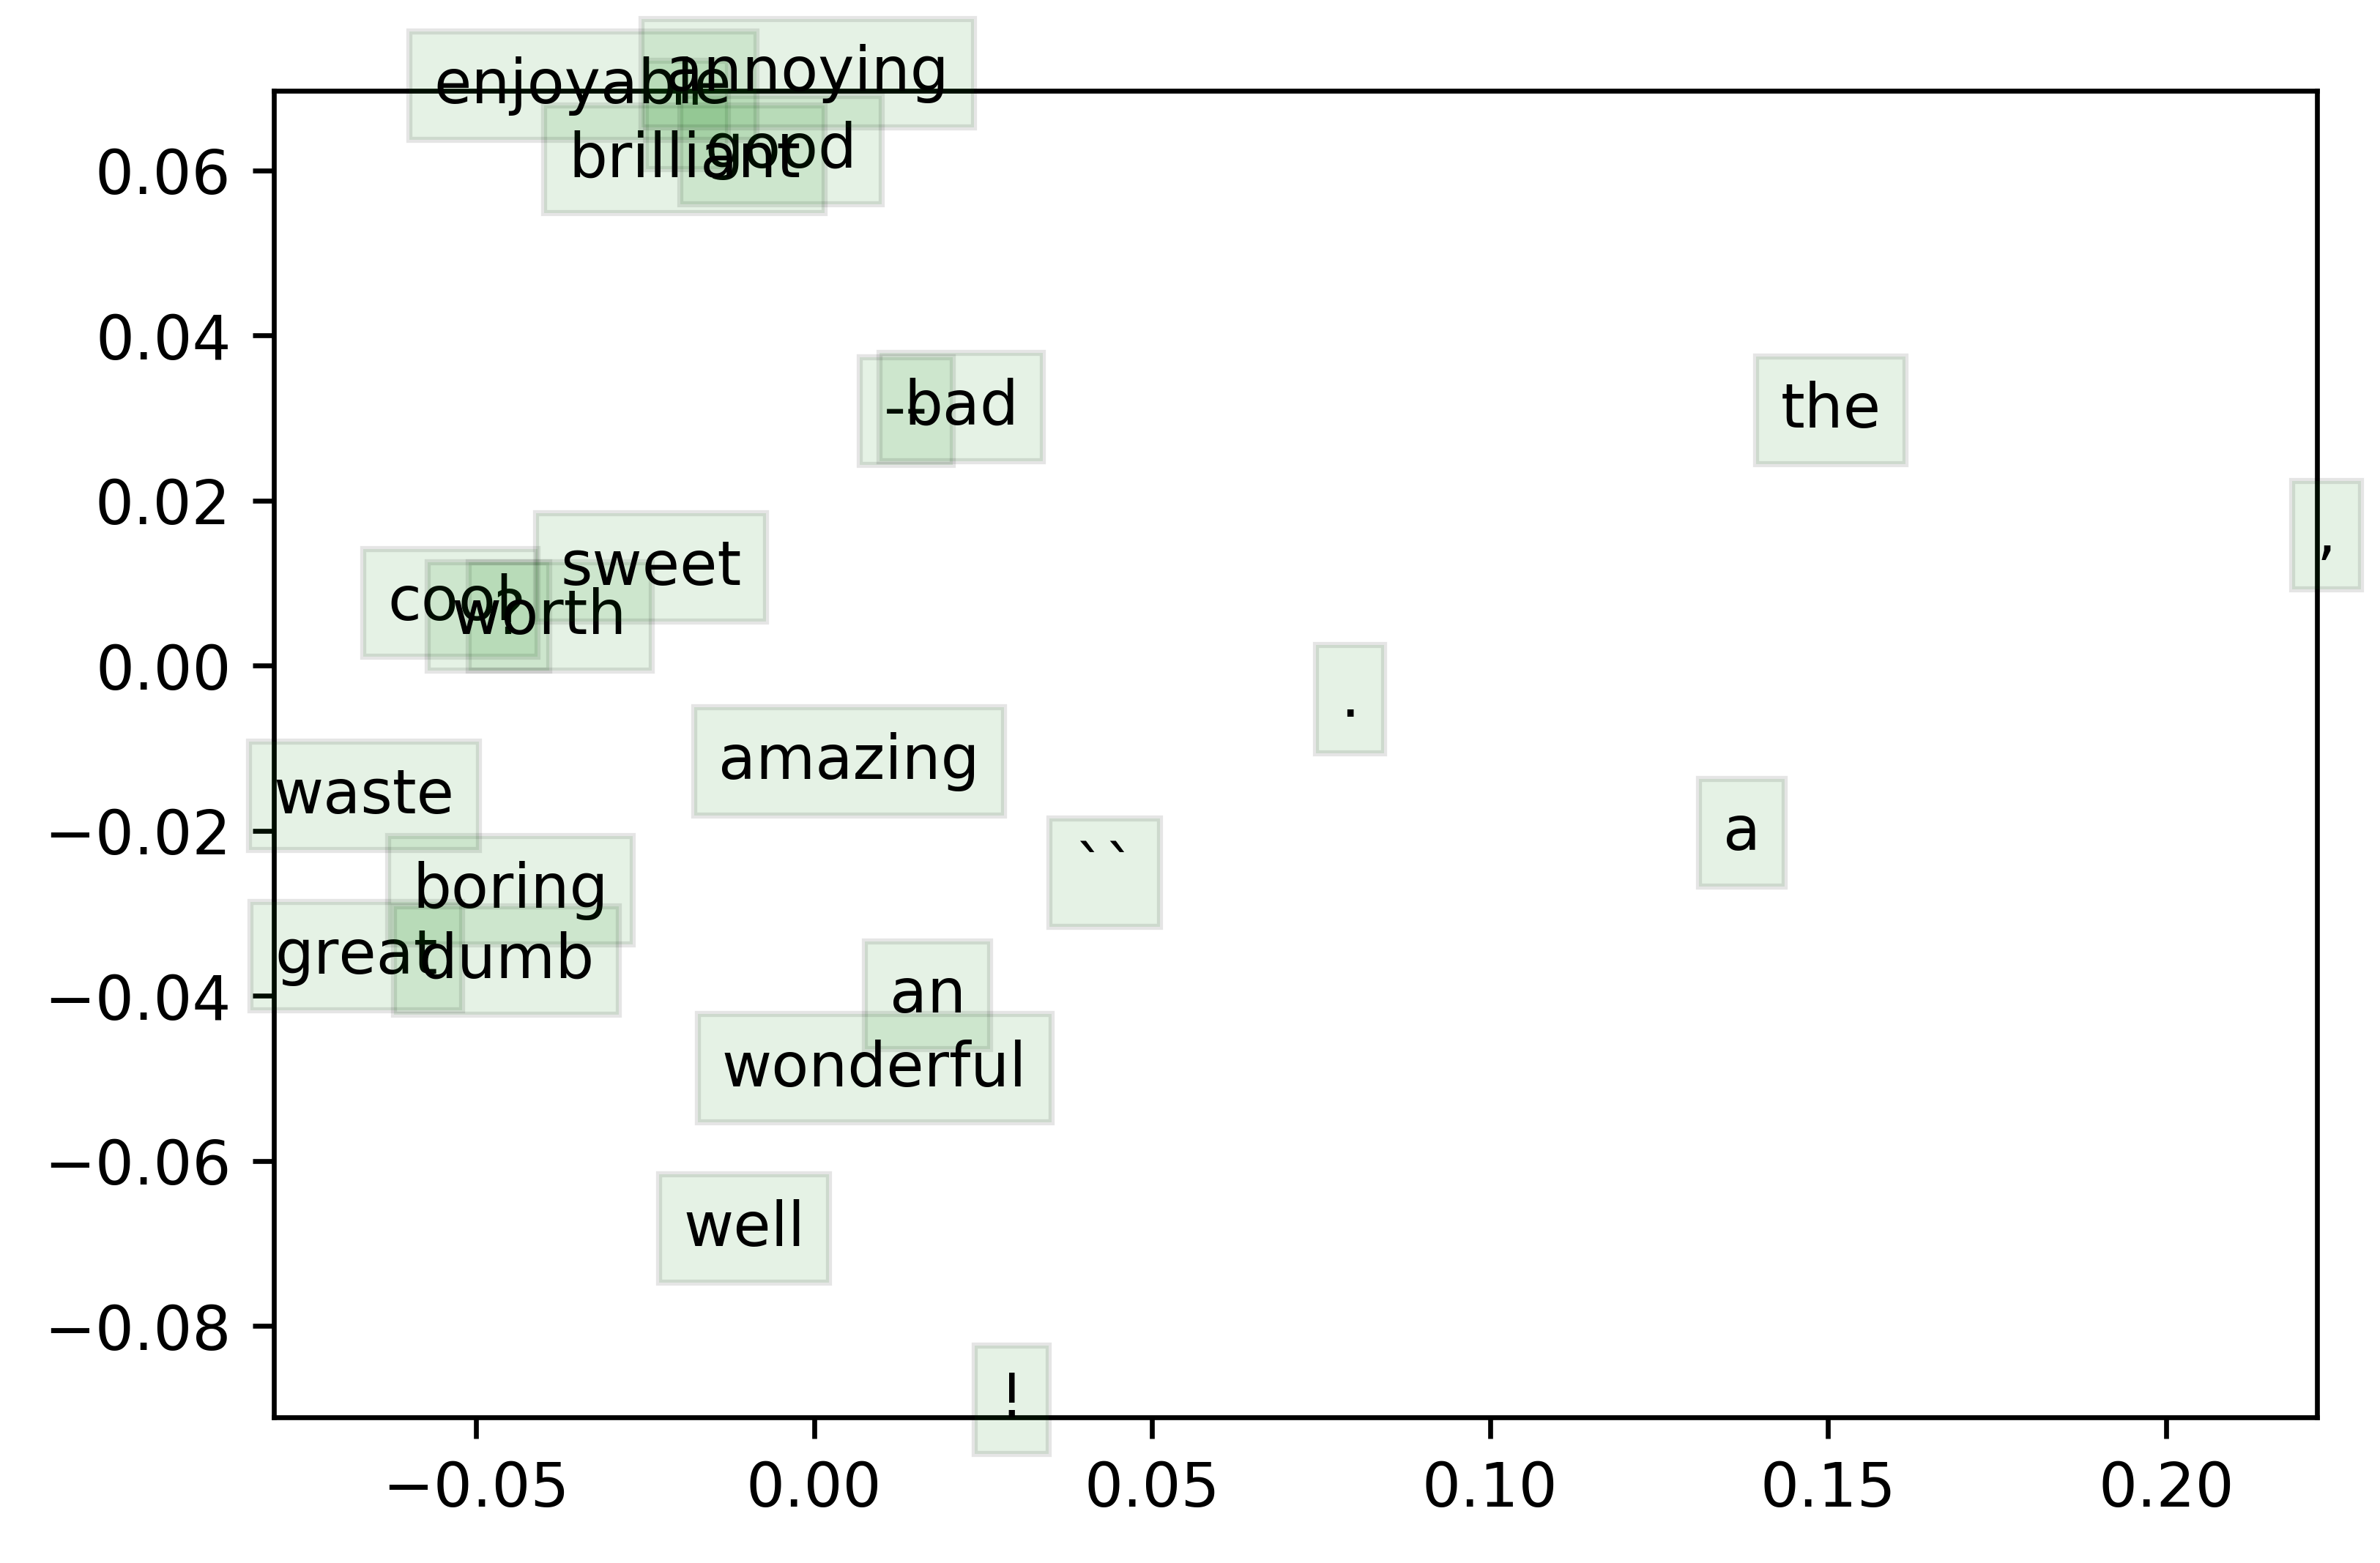

In [10]:
import random
import numpy as np
# from utils.treebank import StanfordSentiment
import matplotlib
# matplotlib.use('agg')
import matplotlib.pyplot as plt
import time
# from q3_word2vec import *
# from q3_sgd import *

# Reset the random seed to make sure that everyone gets the same results
random.seed(314)
dataset = StanfordSentiment()
tokens = dataset.tokens()
nWords = len(tokens)

# We are going to train 10-dimensional vectors for this assignment
dimVectors = 10

# Context size
C = 5

# Reset the random seed to make sure that everyone gets the same results
random.seed(31415)
np.random.seed(9265)

startTime=time.time()
wordVectors_0 = np.concatenate(
    ((np.random.rand(nWords, dimVectors) - 0.5) /
       dimVectors, np.zeros((nWords, dimVectors))),
    axis=0)

# wordVectors = sgd(
#     lambda vec: word2vec_sgd_wrapper(skipgram, tokens, vec, dataset, C,
#         negSamplingCostAndGradient),
#     wordVectors, 0.3, 40000, None, True, PRINT_EVERY=10)



wordVectors_1 = sgd(
    lambda vec: word2vec_sgd_wrapper(skipgram, tokens, vec, dataset, C,
        negSamplingCostAndGradient),
    wordVectors_0, 0.3, 40000, None, False, PRINT_EVERY=10)

# Note that normalization is not called here. This is not a bug,
# normalizing during training loses the notion of length.

print( "sanity check: cost at convergence should be around or below 10")
print( "training took %d seconds" % (time.time() - startTime))

# concatenate the input and output word vectors
wordVectors_2 = np.concatenate(
    (wordVectors_1[:nWords,:], wordVectors_1[nWords:,:]),
    axis=0)
# wordVectors = wordVectors[:nWords,:] + wordVectors[nWords:,:]

visualizeWords = [
    "the", "a", "an", ",", ".", "?", "!", "``", "''", "--",
    "good", "great", "cool", "brilliant", "wonderful", "well", "amazing",
    "worth", "sweet", "enjoyable", "boring", "bad", "waste", "dumb",
    "annoying"]

visualizeIdx = [tokens[word] for word in visualizeWords]
visualizeVecs = wordVectors_2[visualizeIdx, :]
temp = (visualizeVecs - np.mean(visualizeVecs, axis=0))
covariance = 1.0 / len(visualizeIdx) * temp.T.dot(temp)
U,S,V = np.linalg.svd(covariance)
coord = temp.dot(U[:,0:2])

for i in range(len(visualizeWords)):
    plt.text(coord[i,0], coord[i,1], visualizeWords[i],
        bbox=dict(facecolor='green', alpha=0.1))

plt.xlim((np.min(coord[:,0]), np.max(coord[:,0])))
plt.ylim((np.min(coord[:,1]), np.max(coord[:,1])))

# plt.savefig('q3_word_vectors.png')
